In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
from matplotlib import gridspec
from math import pi, ceil
from custom_func import *
from tqdm import tqdm_notebook

In [2]:
path = "./../v0.5/outputs/calculated_index"
path = os.path.join(OUTPUT_PATH,'calculated_index')

filenames = os.listdir(path)
filenames.sort()

df_index = pd.DataFrame()
for filename in filenames:
    if df_index.empty:
        df_index = pd.read_csv(os.path.join(path,filename))
    else:
        df_index = df_index.merge(pd.read_csv(os.path.join(path,filename)),on='region',how='left')
        
print(df_index.shape)
#видалити Київ
df_index = df_index.drop(df_index.index[df_index['region']=='м. Київ']).reset_index(drop=True)
print(df_index.shape)
df_index.head()

(24, 52)
(24, 52)


,region,p1_01,p1_02,p1_03,p1_04,P1,p2_01,p2_02,p2_03,p2_04,...,p7_01,p7_02,p7_06,p7_03,p7_07,P7,p8_03,p8_04,p8_05,P8
0,Волинська,1.000000,0.0,0.229970,0.898782,5.321881,0.599943,0.160247,0.637031,0.073066,...,0.051022,0.396366,0.003741,0.949967,0.003852,2.809897,0.916667,0.490000,1.000000,8.022223
1,Вінницька,0.030567,0.0,0.286085,0.465472,1.955310,0.874382,0.465336,0.919764,0.267598,...,0.293628,0.426904,0.003536,0.987397,0.118780,3.660490,0.916667,0.461663,0.921374,7.665679
2,Дніпропетровська,0.250081,0.0,0.187103,0.607682,2.612164,0.717872,1.000000,0.081421,1.000000,...,0.089121,0.099643,0.001528,0.905594,0.816693,3.825159,0.500000,0.710253,1.000000,7.367510
3,Донецька,0.026206,0.0,0.167278,0.726443,2.299818,0.221649,0.437363,0.204585,0.504806,...,0.085019,0.945254,0.003391,0.897035,0.845265,5.551927,0.833333,0.754647,1.000000,8.626602
4,Житомирська,0.048894,0.0,0.211890,0.814445,2.688073,0.766951,0.294074,0.752153,0.076793,...,0.008858,0.279143,0.001673,0.955882,0.016372,2.523859,1.000000,0.549083,1.000000,8.496942


In [3]:
dict_weights = {
    'P1':2,
    'P2':2,
    'P3':0.5,
    'P4':1,
    'P5':1,
    'P6':2,
    'P7':1,
    'P8':0.5
}

#rows = df_index.loc[:,df_index.columns.str.contains('P')]
#row = rows.iloc[0]
#print(weighted_average(row, dict_weights,df_index.loc[:,df_index.columns.str.contains('P')].columns))

df_index.loc[:,df_index.columns.str.contains('P')].columns

cols = df_index.loc[:,df_index.columns.str.contains('P')].columns
df_index['I'] = df_index.loc[:,df_index.columns.str.contains('P')].apply(lambda x: weighted_average(x,dict_weights,cols),axis=1)*10

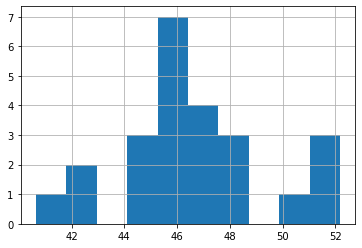

In [4]:
df_index['I'].hist()
plt.show()

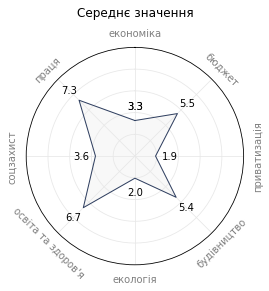

In [5]:
dict_labels = {
        'P1':'економіка',
        'P2':'бюджет',
        'P3':'приватизація',
        'P4':'будівництво',
        'P5':'екологія',
        'P6':"освіта та здоров'я",
        'P7':'соцзахист',
        'P8':'праця'
    }


def draw_spider(ax,angles,values,values_mean,cols):
    #кути, на які слід повернути підписи осі x
    rot_angles = [0,-45,90,45,0,-45,90,45,0]
    
    ax.set_rlabel_position(0)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    yticks = [i for i in range(0,12,2)]
    locs, labels = plt.xticks(angles[:-1], cols, color='grey', size=10,rotation=90)
    plt.yticks(yticks, [])
    
    plt.grid(color='#E8E8E8')
    ax.axis([0, angles[-1], 0, 10])
    ax.fill(angles, values_mean, color='gray', alpha=0.05)
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2f3f60')
    for i,j in zip(angles,values):
        ax.annotate(str(round(j,1)),xy=(i,j+1.3), ha='center', va='center')
    
    #перемалювати підписи осі x із поворотом
    plt.gcf().canvas.draw()
    for label, angle in zip(labels, rot_angles):
        x,y = label.get_position()
        ax.text(x,y, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va(), color='grey', rotation=angle)
    ax.set_xticklabels([])

rcParams['font.size'] = 10
    
N = len(cols)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles.append(2 * pi)

values_mean = list(df_index[cols].mean())
values_mean.append(values_mean[0])
x_labels = [dict_labels[col] for col in cols]

ax = plt.subplot(111, polar=True)
draw_spider(ax,angles,values_mean,values_mean,x_labels)
ax.set_title('Середнє значення',pad=20)

plt.show()

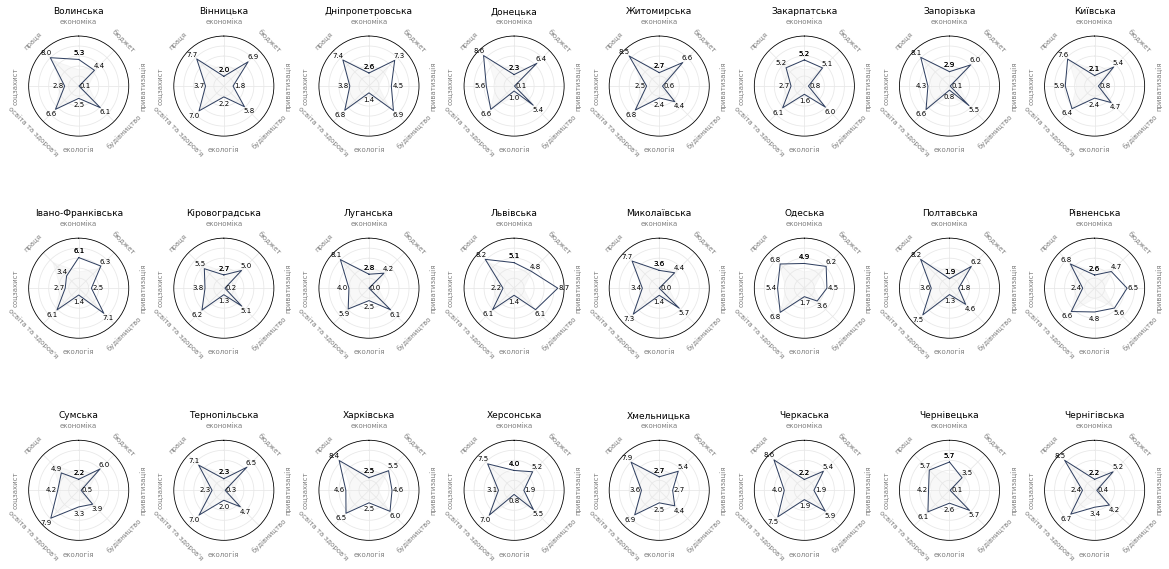

In [6]:
rcParams['font.size'] = 7

values_mean = list(df_index[cols].mean())
values_mean.append(values_mean[0])
x_labels = [dict_labels[col] for col in cols]

total = df_index.shape[0]
sub_cols = 8
sub_rows = ceil(total/sub_cols)

fig = plt.figure(figsize=(20,10))
counter = 0

for r in range(sub_rows):
    for c in range(sub_cols):
        values = list(df_index.loc[counter,cols])
        values.append(values[0])
        title = df_index.loc[counter,'region']
        counter += 1
        if counter <= total:
            ax = plt.subplot2grid((sub_rows,sub_cols), (r,c),polar=True)
            draw_spider(ax,angles,values,values_mean,x_labels)
            ax.set_title(title,pad=17,fontsize=9)

plt.subplots_adjust(wspace = 0.45, hspace = 0.45)

#plt.savefig('./../00_viz/00_index_gen_v3.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()

In [7]:
rcParams['font.size'] = 12

def delete_frame(ax):
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

def draw_profile_gen(df,reg_index):
    fig = plt.figure(figsize=(6,4))
    values_mean = df_index[cols].mean().sort_index(ascending=False)
    values = df_index.loc[reg_index,cols].sort_index(ascending=False)
    x_labels = [dict_labels[col] for col in cols]
    x_labels.reverse()
    title = df_index.loc[reg_index,'region']

    colors = []
    for i in range(values_mean.shape[0]):
        if values[i] >= values_mean[i]:
            #colors.append('#00b874')
            colors.append('#007f86')
        elif values[i] < values_mean[i]:
            #colors.append('#ff6850')
            colors.append('#a3550f')

    ax = plt.subplot(111)
    delete_frame(ax)

    for ind in range(values_mean.shape[0]):
        ax.plot([values_mean[ind],values[ind]],[values_mean.index[ind],values_mean.index[ind]],color='black',zorder=0)
        diff = values[ind]-values_mean[ind]
        ax.annotate(str(round(diff,1)),xy=(values[ind]-diff/2,ind+0.35), ha='center', va='center',color=colors[ind],fontsize=8)
        ax.annotate(str(round(values[ind],1)),xy=(values[ind],ind-0.4), ha='center', va='center',fontsize=8)

    ax.scatter(values_mean,values_mean.index,color='gray',zorder=1,s=35)
    ax.scatter(values,values.index,color=colors,zorder=2,alpha=1,s=35)

    #ax.set_title(title+' область',pad=10)
    ax.set_yticklabels(x_labels)
    ax.set_xlim(0,10)
    ax.set_ylim(-1,8)
    ax.set_xlim(-1,11)

    plt.savefig(f'./../00_viz/00_viz_gen_noname/01_region_profile_gen_{reg_index}.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=True)
    #plt.show()
    plt.close()
    
def draw_profile_det(df,reg_index):
    #наразі захардкодив максимальну кількість параметрів нижнього рівня
    max_params = 10

    x_labels = [dict_labels[col] for col in cols]
    total = len(x_labels)
    sub_cols = 4
    sub_rows = ceil(total/sub_cols)

    fig = plt.figure(figsize=(22,10))
    counter = 0
    for r in range(sub_rows):
        for c in range(sub_cols):
            title = x_labels[counter]
            counter += 1
            if counter <= total:
                cols_lower = df_index.loc[:,df_index.columns.str.contains('p'+str(counter))].columns
                values_mean = df_index[cols_lower].mean().sort_index(ascending=False)
                values_mean_all = list(np.zeros(max_params-values_mean.shape[0]))+list(values_mean)
                #index_labels_all = ['' for i in range(max_params-values_mean.shape[0]+1)]+list(values_mean.index)
                index_labels_all = ['' for i in range(max_params-values_mean.shape[0])]+list(values_mean.index)
                values_reg = df_index.loc[reg_index,cols_lower].sort_index(ascending=False)
                values_reg = values_reg.map(lambda x: x+0.0000001 if x==0 else x)
                values_reg_all = list(np.zeros(max_params-values_reg.shape[0]))+list(values_reg)

                colors = []
                for i in range(len(values_mean_all)):
                    if values_reg_all[i] >= values_mean_all[i]:
                        #colors.append('#00b874')
                        colors.append('#007f86')
                    elif values_reg_all[i] < values_mean_all[i]:
                        #colors.append('#ff6850')
                        colors.append('#a3550f')

                ax = plt.subplot2grid((sub_rows,sub_cols), (r,c))
                delete_frame(ax)
                for ind in range(len(values_mean_all)):
                    ax.plot([values_mean_all[ind],values_reg_all[ind]],[ind,ind],color='black',zorder=0)
                    if values_reg_all[ind]>0:
                        diff = values_reg_all[ind]-values_mean_all[ind]
                        ax.annotate(str(round(diff,2)),xy=(values_reg_all[ind]-diff/2,ind+0.3), ha='center', va='center',color=colors[ind],fontsize=8)
                        ax.annotate(str(round(values_reg_all[ind],2)),xy=(values_reg_all[ind],ind-0.35), ha='center', va='center',fontsize=8)
                ax.scatter(values_mean_all,[i for i in range(max_params)],s=[i if i==0 else 35 for i in values_mean_all],color='gray',zorder=1)
                ax.scatter(values_reg_all,[i for i in range(max_params)],s=[i if i==0 else 35 for i in values_reg_all],color=colors,zorder=2)
                ax.set_yticks([i for i in range(10)])
                ax.set_yticklabels(index_labels_all)
                ax.set_xlim(-0.1,1.1)
                ax.set_title(title,pad=17)

    title = df_index.loc[reg_index,'region'] + ' область: загальний профіль'
    fig.suptitle(title, fontsize=22, weight='bold', alpha=0.95)
    plt.subplots_adjust(top=0.89, wspace=0.3, hspace=0.3)

    plt.savefig(f'./../00_viz/01_viz_det/02_region_profile_det_{reg_index}.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=True)
    #plt.show()
    plt.close()

In [15]:
#зробити візуалізації лише для всіх областей
for ind in tqdm_notebook(range(df_index.shape[0])):
    draw_profile_gen(df_index,ind)
    draw_profile_det(df_index,ind)

<ipython-input-15-936cb5c5943d>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ind in tqdm_notebook(range(df_index.shape[0])):


In [9]:
#зробити візуалізації лише для однієї області
reg_index = 0
draw_profile_gen(df_index,reg_index)
draw_profile_det(df_index,reg_index)

In [12]:
df_index.to_csv(os.path.join(OUTPUT_PATH,'00_index_2020-08-13.csv'),index=False)

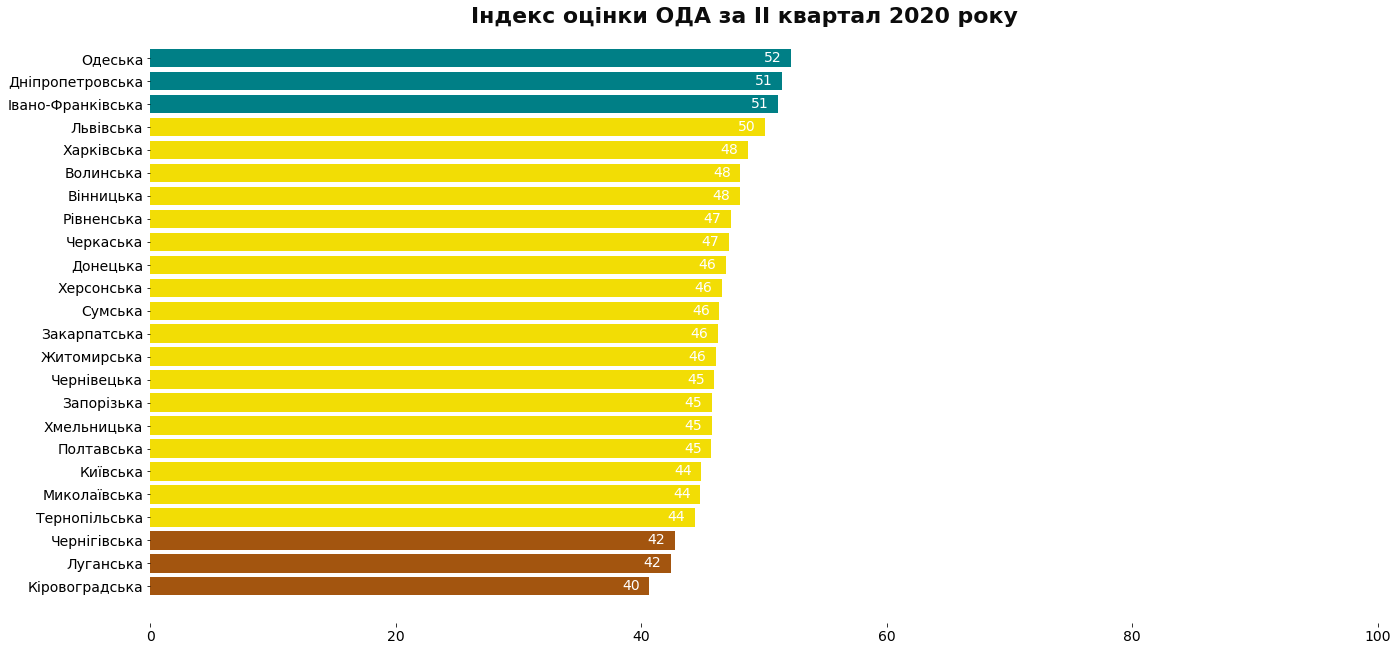

In [8]:
rcParams['font.size'] = 14
df_index_hist = df_index[['region','I']].sort_values(by='I').reset_index(drop=True)

fig = plt.figure(figsize=(22,10))
ax = plt.subplot(111)
delete_frame(ax)
colors = ['#a3550f','#f2dd05','#007f86']
colors_list = [colors[0] for r in range(3)] + [colors[1] for y in range(df_index_hist.shape[0]-6)] + [colors[2] for g in range(3)]

ax.barh(df_index_hist['region'],df_index_hist['I'],color=colors_list)
for i in df_index_hist.index:
    ax.annotate(int(df_index_hist.loc[i,'I']),xy=(df_index_hist.loc[i,'I']-2.2,df_index_hist.loc[i,'region']), c='white', va='center')
ax.set_xlim(0,100)

fig.suptitle('Індекс оцінки ОДА за ІІ квартал 2020 року', fontsize=22, weight='bold', alpha=0.95)
plt.subplots_adjust(top=0.96)
#plt.savefig('./../00_viz/00_index_ranking_v3.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()

p1_04
p1_03
p1_02
p1_01


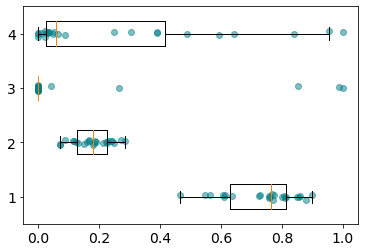

In [71]:
df_cur = df_index.loc[:,df_index.columns.str.contains(f"p{1}")]
df_cur = df_cur[df_cur.columns.sort_values(ascending=False)]

plt.boxplot(df_cur.T,vert=False,sym='')
for ind,col in enumerate(df_cur.columns):
    print(col)
    plt.scatter(df_cur[col],y_noise+ind,alpha=0.5,color='#007f86')

plt.show()

In [142]:
df_index.loc[:,df_index.columns.str.contains(f"region|p{2}")]

,region,p2_01,p2_02,p2_03,p2_04,p2_05,p2_06,p2_07,p2_08,p2_09,p2_10
0,Волинська,0.599943,0.160247,0.637031,0.073066,0.072148,0.206889,0.986865,0.880353,0.995544,0.961596
1,Вінницька,0.874382,0.465336,0.919764,0.267598,0.302305,0.897660,0.960989,0.907409,0.000000,0.980747
2,Дніпропетровська,0.717872,1.000000,0.081421,1.000000,1.000000,0.534099,0.603754,0.807762,1.000000,1.000000
3,Донецька,0.221649,0.437363,0.204585,0.504806,0.216313,0.938619,0.996227,0.992717,1.000000,0.995186
4,Житомирська,0.766951,0.294074,0.752153,0.076793,0.158528,0.847306,0.995615,0.987769,0.996131,0.989766
5,Закарпатська,0.347174,0.115136,0.281686,0.120125,0.028436,0.709900,0.998323,0.948289,0.999682,0.991721
6,Запорізька,0.699201,0.425825,0.276226,0.172996,0.329854,0.869832,0.997308,0.885020,0.983006,0.186548
7,Київська,0.839828,0.575290,0.274995,0.726074,0.335364,0.575906,0.938258,0.000000,0.976642,0.000000
8,Івано-Франківська,0.649869,0.285045,0.972227,0.274086,0.201656,0.591433,0.993898,0.961750,0.896272,0.982215
9,Кіровоградська,0.475612,0.105768,0.156829,0.001454,0.163774,0.670143,0.991125,0.897501,0.999028,0.999730


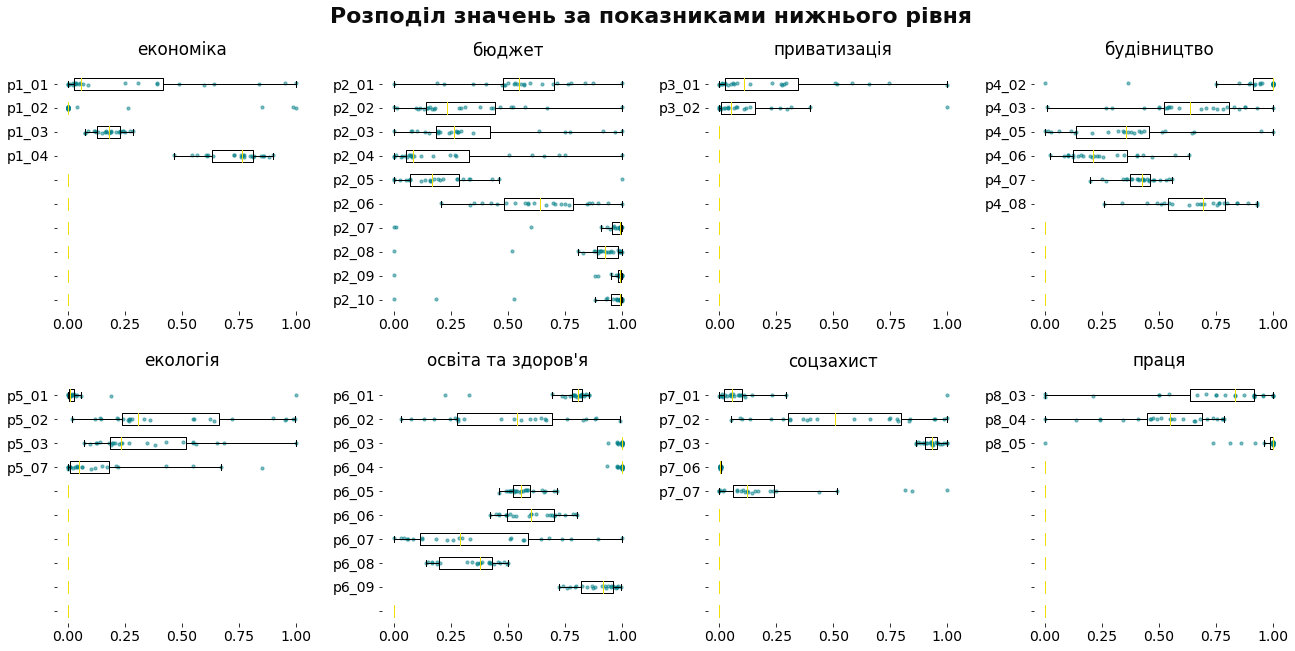

In [147]:
max_params = 10
numbers = [i for i in range(10)]

x_labels = [dict_labels[col] for col in cols]
total = len(x_labels)
sub_cols = 4
sub_rows = ceil(total/sub_cols)

fig = plt.figure(figsize=(22,10))
counter = 0
for r in range(sub_rows):
    for c in range(sub_cols):
        title = x_labels[counter]
        counter += 1
        df_cur = df_index.loc[:,df_index.columns.str.contains(f"p{counter}")]
        df_cur = df_cur[df_cur.columns.sort_values(ascending=False)]
        if df_cur.shape[1]<10:
            df_empty = pd.concat([pd.Series(np.zeros(df_cur.shape[0])) for i in range(10-len(df_cur.columns))],axis=1)
            df_all = pd.concat([df_empty,df_cur],axis=1)
        else:
            df_all = df_cur
        
        #values_mean_all = list(np.zeros(max_params-values_mean.shape[0]))+list(values_mean)
        #index_labels_all = ['' for i in range(max_params-values_mean.shape[0]+1)]+list(values_mean.index)
        #index_labels_all = ['' for i in range(max_params-values_mean.shape[0])]+list(values_mean.index)
        
        ax = plt.subplot2grid((sub_rows,sub_cols), (r,c))
        delete_frame(ax)
        ax.boxplot(df_all.T,vert=False,sym='',whis=3,medianprops={'color':'#f2dd05'})
        for ind,col in enumerate(df_all.columns):
            if col not in numbers:
                ax.scatter(df_all[col],y_noise+ind,alpha=0.5,color='#007f86',s=10)
                
        ax.set_yticklabels(['' if i in numbers else i for i in df_all.columns])
        ax.set_title(title,pad=17)

title = 'Розподіл значень за показниками нижнього рівня'
fig.suptitle(title, fontsize=22, weight='bold', alpha=0.95)
plt.subplots_adjust(top=0.89, wspace=0.3, hspace=0.3)

plt.savefig('./../00_viz/01_params_distr.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()